In [1]:
import os
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt

In [2]:
housing = pd.read_csv('housing.csv')

# Training and Testing Sets

In [16]:
# np.random.seed(206)
np.random.permutation(10)

array([6, 7, 0, 2, 5, 3, 8, 4, 9, 1])

In [26]:
def split_train_test(data, test_ratio, seed = 206):
    np.random.seed(seed)
    n = len(data)
    train_size = int(n * (1-test_ratio))
    # test_size = n - train_size

    shuffled_indices = np.random.permutation(n)

    train_indices = shuffled_indices[:train_size]
    test_indices = shuffled_indices[train_size:]

    return data.iloc[train_indices], data.iloc[test_indices]

In [28]:
train_set, test_set = split_train_test(housing, 0.2)

In [23]:
train_set.shape, test_set.shape

((16512, 10), (4128, 10))

In [29]:
from sklearn.model_selection import train_test_split

train_set, test_set = train_test_split(housing, test_size=0.2, random_state=206)

train_set.shape, test_set.shape

((16512, 10), (4128, 10))

# Predictors and Label

In [34]:
# label
housing_label = train_set['median_house_value'].copy()

# predictors
housing_X = train_set.drop('median_house_value', axis=1)

In [33]:
housing_X.shape

(16512, 9)

# Handle NAs

In [35]:
housing_X.info()

<class 'pandas.core.frame.DataFrame'>
Index: 16512 entries, 13219 to 7957
Data columns (total 9 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   longitude           16512 non-null  float64
 1   latitude            16512 non-null  float64
 2   housing_median_age  16512 non-null  float64
 3   total_rooms         16512 non-null  float64
 4   total_bedrooms      16343 non-null  float64
 5   population          16512 non-null  float64
 6   households          16512 non-null  float64
 7   median_income       16512 non-null  float64
 8   ocean_proximity     16512 non-null  object 
dtypes: float64(8), object(1)
memory usage: 1.3+ MB


## Method 1: Delete rows

In [38]:
housing_X_dropna = housing_X.dropna(subset=['total_bedrooms'])
housing_X_dropna.info()

<class 'pandas.core.frame.DataFrame'>
Index: 16343 entries, 13219 to 7957
Data columns (total 9 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   longitude           16343 non-null  float64
 1   latitude            16343 non-null  float64
 2   housing_median_age  16343 non-null  float64
 3   total_rooms         16343 non-null  float64
 4   total_bedrooms      16343 non-null  float64
 5   population          16343 non-null  float64
 6   households          16343 non-null  float64
 7   median_income       16343 non-null  float64
 8   ocean_proximity     16343 non-null  object 
dtypes: float64(8), object(1)
memory usage: 1.2+ MB


## Method 2: Delete the column

In [39]:
housing_X_dropna_cal = housing_X.drop('total_bedrooms', axis=1)
housing_X_dropna_cal.info()

<class 'pandas.core.frame.DataFrame'>
Index: 16512 entries, 13219 to 7957
Data columns (total 8 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   longitude           16512 non-null  float64
 1   latitude            16512 non-null  float64
 2   housing_median_age  16512 non-null  float64
 3   total_rooms         16512 non-null  float64
 4   population          16512 non-null  float64
 5   households          16512 non-null  float64
 6   median_income       16512 non-null  float64
 7   ocean_proximity     16512 non-null  object 
dtypes: float64(7), object(1)
memory usage: 1.1+ MB


In [40]:
housing_X.shape

(16512, 9)

## Method 3: Set NA as median

In [42]:
housing_X_2 = housing_X.copy()

median = housing_X_2['total_bedrooms'].median()
median

434.0

In [49]:
housing_X_2['total_bedrooms'].fillna(median, inplace=True)

In [50]:
housing_X_2.info()

<class 'pandas.core.frame.DataFrame'>
Index: 16512 entries, 13219 to 7957
Data columns (total 9 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   longitude           16512 non-null  float64
 1   latitude            16512 non-null  float64
 2   housing_median_age  16512 non-null  float64
 3   total_rooms         16512 non-null  float64
 4   total_bedrooms      16512 non-null  float64
 5   population          16512 non-null  float64
 6   households          16512 non-null  float64
 7   median_income       16512 non-null  float64
 8   ocean_proximity     16512 non-null  object 
dtypes: float64(8), object(1)
memory usage: 1.3+ MB


# Text and Categorical Variables

In [52]:
housing_X_2['ocean_proximity'].value_counts()

ocean_proximity
<1H OCEAN     7262
INLAND        5289
NEAR OCEAN    2117
NEAR BAY      1841
ISLAND           3
Name: count, dtype: int64

In [53]:
housing_X_2['ocean_proximity']

13219    NEAR OCEAN
429          INLAND
6261     NEAR OCEAN
7413      <1H OCEAN
8565         INLAND
            ...    
6602         INLAND
14398     <1H OCEAN
15524     <1H OCEAN
18898        INLAND
7957         INLAND
Name: ocean_proximity, Length: 16512, dtype: object

In [60]:
from sklearn.preprocessing import OneHotEncoder

cat_encoder = OneHotEncoder()

housing_cat = housing_X_2[['ocean_proximity']]

housing_cat_1hot = cat_encoder.fit_transform(housing_cat)

In [61]:
housing_cat_1hot

<16512x5 sparse matrix of type '<class 'numpy.float64'>'
	with 16512 stored elements in Compressed Sparse Row format>

In [62]:
housing_cat_1hot.toarray()

array([[0., 0., 0., 0., 1.],
       [0., 1., 0., 0., 0.],
       [0., 0., 0., 0., 1.],
       ...,
       [1., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0.],
       [0., 1., 0., 0., 0.]])

In [63]:
cat_encoder.categories_

[array(['<1H OCEAN', 'INLAND', 'ISLAND', 'NEAR BAY', 'NEAR OCEAN'],
       dtype=object)]

In [65]:
housing.describe()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
count,20640.000000,20640.000000,20640.000000,20640.000000,20433.000000,20640.000000,20640.000000,20640.000000,20640.000000
mean,-119.569704,35.631861,28.639486,2635.763081,537.870553,1425.476744,499.539680,3.870671,206855.816909
std,2.003532,2.135952,12.585558,2181.615252,421.385070,1132.462122,382.329753,1.899822,115395.615874
min,-124.350000,32.540000,1.000000,2.000000,1.000000,3.000000,1.000000,0.499900,14999.000000
25%,-121.800000,33.930000,18.000000,1447.750000,296.000000,787.000000,280.000000,2.563400,119600.000000
50%,-118.490000,34.260000,29.000000,2127.000000,435.000000,1166.000000,409.000000,3.534800,179700.000000
75%,-118.010000,37.710000,37.000000,3148.000000,647.000000,1725.000000,605.000000,4.743250,264725.000000
max,-114.310000,41.950000,52.000000,39320.000000,6445.000000,35682.000000,6082.000000,15.000100,500001.000000


# Transformation and Scaling

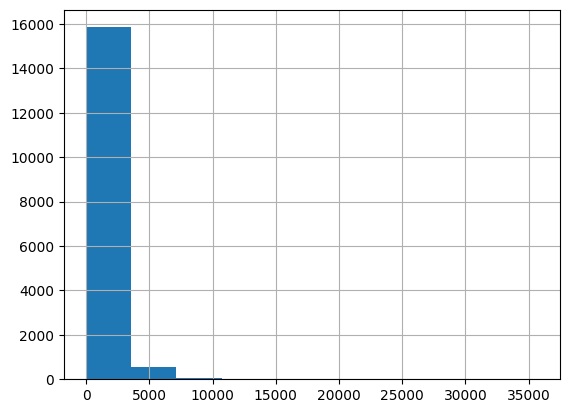

In [67]:
housing_X_2['population'].hist()
plt.show()

In [72]:
housing_X_2_num = housing_X_2.drop('ocean_proximity', axis=1)
housing_X_2_num.info()

<class 'pandas.core.frame.DataFrame'>
Index: 16512 entries, 13219 to 7957
Data columns (total 8 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   longitude           16512 non-null  float64
 1   latitude            16512 non-null  float64
 2   housing_median_age  16512 non-null  float64
 3   total_rooms         16512 non-null  float64
 4   total_bedrooms      16512 non-null  float64
 5   population          16512 non-null  float64
 6   households          16512 non-null  float64
 7   median_income       16512 non-null  float64
dtypes: float64(8)
memory usage: 1.1 MB


In [75]:
from sklearn.preprocessing import MinMaxScaler

min_max_scaler = MinMaxScaler(feature_range=(0, 1))

housing_num_min_max_scaled = min_max_scaler.fit_transform(housing_X_2_num)

# housing_num_min_max_scaled

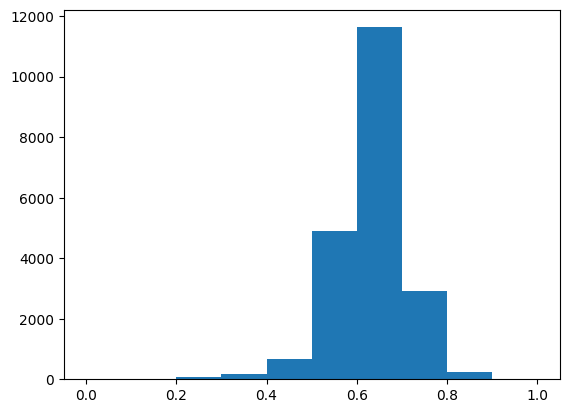

In [79]:
min_max_scaler_pop = MinMaxScaler(feature_range=(0, 1))
pop_min_max_scaled = min_max_scaler_pop.fit_transform(housing[['population']].apply(np.log))

plt.hist(pop_min_max_scaled)
plt.show()